<a href="https://colab.research.google.com/github/LxMera/Convolutional-Neural-Network-for-the-classification-of-independent-components-of-rs-fMRI/blob/master/Graphics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import scipy.io as sio
import pandas as pd
from tabulate import tabulate
import seaborn as sns
import os.path as path

In [0]:
PATH='drive/My Drive/AnexoResul/'

In [0]:
summ=glob.glob(PATH+'*')
MODELS=['MODEL1-','LAYER1-','LAYER2-','LAYER3-','LAYER4-','LeNet-']
MODEL2=['TREE1-','TREE2-','TREE4-','TRLENET-']
MODEL3=['REE1-','REE2-','REE4-','RLENET-']
IMAGE=['AXI-','COM-','BLU-','PCA-','C_AXI-','C_COM-','C_BLU-','C_PCA-']
ORDER=['PCA','C_PCA', 'AXI', 'C_AXI', 'COM', 'C_COM', 'BLU', 'C_BLU']
NAMES=['MET 1','MET-C 1', 'MET 2', 'MET-C 2', 'MET 3','MET-C 3','MET 4','MET-C 3']
SLIC=['Axial-','Coronal-','Saggital-']
SLICN=['Axial-','Coronal-','Sagittal-']

NANMO=['MODEL 1','MODEL 2','MODEL 3','MODEL 4','MODEL 5','MODEL 6']
NANMT=['MODEL 7','MODEL 8','MODEL 9','MODEL 10']

In [5]:
for i in summ:
  print(i)

drive/My Drive/AnexoResul/adosHP.csv
drive/My Drive/AnexoResul/dos-01.csv
drive/My Drive/AnexoResul/dos-02.csv
drive/My Drive/AnexoResul/tados0.csv
drive/My Drive/AnexoResul/tados1.csv
drive/My Drive/AnexoResul/tados2.csv
drive/My Drive/AnexoResul/tados4.csv
drive/My Drive/AnexoResul/tados3.csv
drive/My Drive/AnexoResul/tados5.csv
drive/My Drive/AnexoResul/tadoX0.csv
drive/My Drive/AnexoResul/tadoX1.csv
drive/My Drive/AnexoResul/tadoX2.csv
drive/My Drive/AnexoResul/tadoX3.csv
drive/My Drive/AnexoResul/tadoX4.csv
drive/My Drive/AnexoResul/tadoX5.csv
drive/My Drive/AnexoResul/sHP-TR.csv
drive/My Drive/AnexoResul/sHP-TE.csv
drive/My Drive/AnexoResul/dos-03.csv
drive/My Drive/AnexoResul/dos-04.csv
drive/My Drive/AnexoResul/tadoT2.csv
drive/My Drive/AnexoResul/tadoT0.csv
drive/My Drive/AnexoResul/tadoT1.csv
drive/My Drive/AnexoResul/tadoT3.csv
drive/My Drive/AnexoResul/tadoT4.csv
drive/My Drive/AnexoResul/tadoT5.csv
drive/My Drive/AnexoResul/tadTX0.csv
drive/My Drive/AnexoResul/tadTX1.csv
d

In [0]:
frame = pd.read_csv(summ[0])
#framev=frame.iloc[:,[1, 2, 3, 4, 6]]
#framet=frame.iloc[:,[1, 2, 3, 4, 9]]
#framex=pd.concat([framev, framet], axis=0,  sort=False)
#framex.head()

### Evaluación de los métodos en función de los arquitecturas

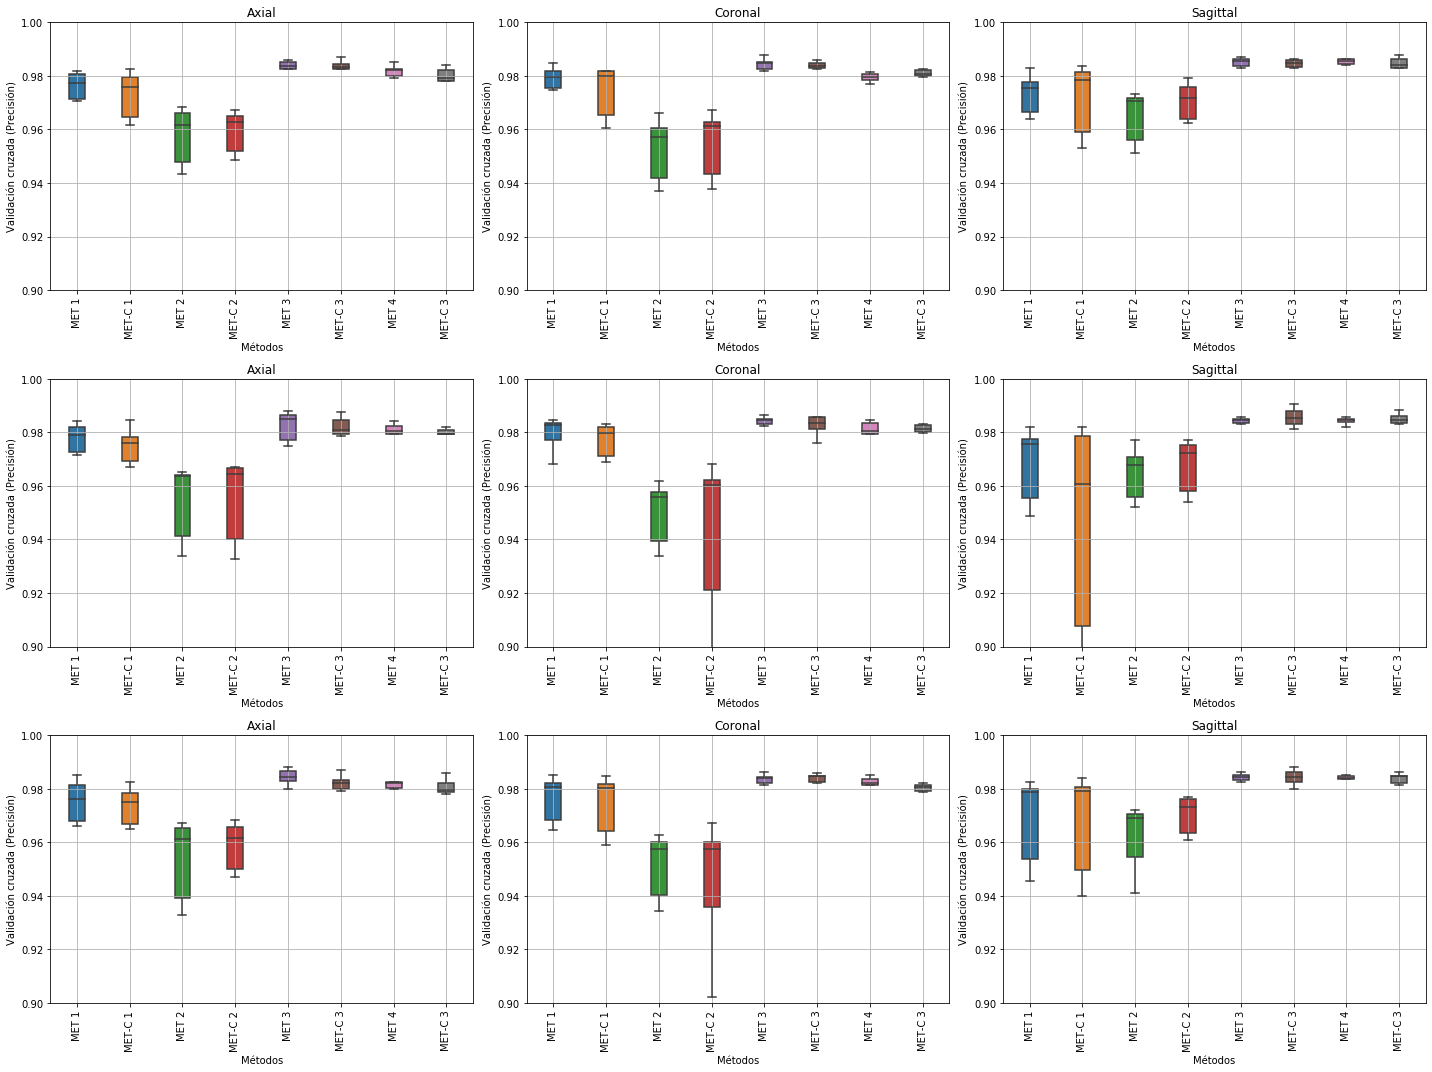

In [7]:
plt.figure(figsize=(20,15))
cont=1
for p in range(3):

  df =frame.loc[:, 'sample'] == p
  df = frame.loc[df]
  
  for q in range(3):

    df2= df.loc[:, 'slice'] == SLIC[q][:-1]
    df2= df.loc[df2]

    plt.subplot(3,3,cont)
    sns.boxplot(x="images", y="val_acc", data=df2, width=0.3, order=ORDER, showfliers = False)
    plt.title(SLICN[q][:-1])
    plt.xlabel('Métodos')
    plt.ylabel('Validación cruzada (Precisión)')
    plt.ylim((0.90, 1))
    plt.grid()
    plt.xticks(np.arange(8), NAMES, rotation='vertical')
    plt.tight_layout()    
    cont=cont+1
plt.savefig("MetodosPorMuestra.svg")

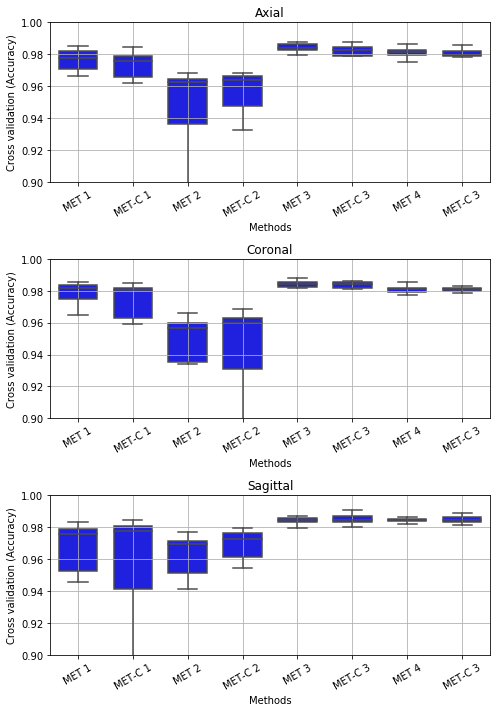

In [8]:
plt.figure(figsize=(7,10))
cont=1
for q in range(3):
  df2= frame.loc[:, 'slice'] == SLIC[q][:-1]
  df2= frame.loc[df2]
  plt.subplot(3,1,cont)
  sns.boxplot(x="images", y="val_acc", data=df2, width=0.7, order=ORDER, showfliers = False, color='blue')
  #sns.boxplot(x="images", y="test_acc", data=df2, width=0.7, order=ORDER, showfliers = False, color='red')
  plt.title(SLICN[q][:-1])
  plt.xlabel('Methods')
  plt.ylabel('Cross validation (Accuracy)')
  plt.ylim((0.90, 1))
  plt.grid()
  plt.xticks(np.arange(8), NAMES, rotation=30)
  plt.tight_layout()
  cont=cont+1

plt.savefig("ACCMetodostodaslasMuestras.svg")

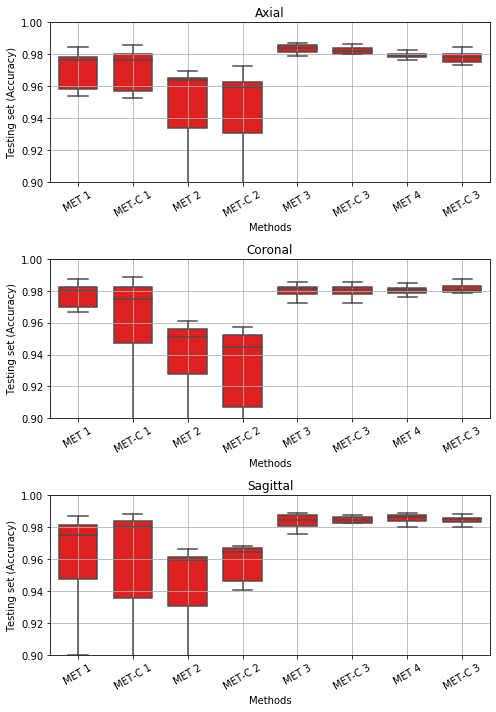

In [9]:
plt.figure(figsize=(7,10))
cont=1
for q in range(3):
  df2= frame.loc[:, 'slice'] == SLIC[q][:-1]
  df2= frame.loc[df2]
  plt.subplot(3,1,cont)
  sns.boxplot(x="images", y="test_acc", data=df2, width=0.7, order=ORDER, showfliers = False, color='red')
  #sns.boxplot(x="images", y="test_acc", data=df2, width=0.7, order=ORDER, showfliers = False, color='red')
  plt.title(SLICN[q][:-1])
  plt.xlabel('Methods')
  plt.ylabel('Testing set (Accuracy)')
  plt.ylim((0.90, 1))
  plt.grid()
  plt.xticks(np.arange(8), NAMES, rotation=30)
  plt.tight_layout()
  cont=cont+1

plt.savefig("TESTMetodostodaslasMuestras.svg")

In [10]:
grp=15
frame3 = pd.read_csv(summ[grp])
print(summ[grp])
print(frame3)

drive/My Drive/AnexoResul/sHP-TR.csv
    Unnamed: 0  sample   models images  ...   val_acc      loss   val_loss  test_acc
0            0       0    TREE1    AXI  ...  0.895139  0.454344   0.340223  0.895760
1            1       1    TREE1    AXI  ...  0.104861  0.422766  31.927922  0.104240
2            2       2    TREE1    AXI  ...  0.895139  0.458267   0.346103  0.895760
3            3       0    TREE1    COM  ...  0.985254  0.352909   0.193672  0.970061
4            4       1    TREE1    COM  ...  0.895139  0.412116   0.338362  0.896635
..         ...     ...      ...    ...  ...       ...       ...        ...       ...
86          86       1  TRLENET  C_BLU  ...  0.986892  0.187710   0.090229  0.987325
87          87       2  TRLENET  C_BLU  ...  0.988531  0.263846   0.093034  0.986670
88          88       0  TRLENET  C_PCA  ...  0.985254  0.439747   0.238974  0.987325
89          89       1  TRLENET  C_PCA  ...  0.986892  0.300628   0.118999  0.989510
90          90       2  TRLE

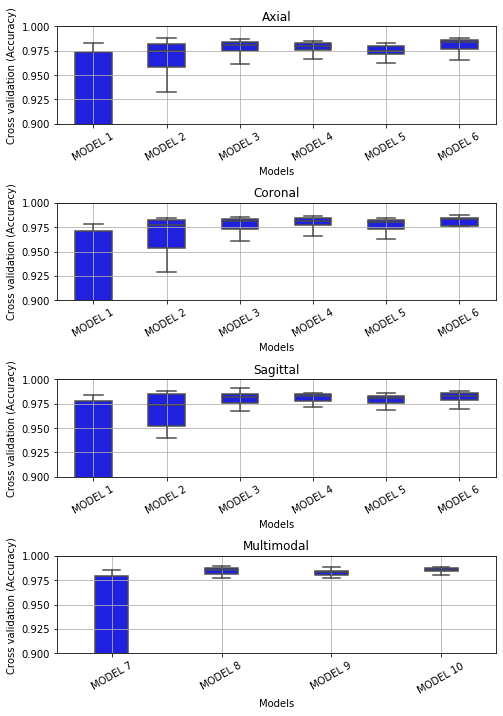

In [11]:
plt.figure(figsize=(7,10))
cont=1

for q in range(3):
  df2= frame.loc[:, 'slice'] == SLIC[q][:-1]
  df2= frame.loc[df2]
  plt.subplot(4,1,cont)
  sns.boxplot(x="models", y="val_acc", data=df2, width=0.5, showfliers = False, color='blue')
  plt.title(SLICN[q][:-1])
  plt.xlabel('Models')
  plt.ylabel('Cross validation (Accuracy)')
  plt.ylim((0.9, 1))
  plt.grid()
  plt.xticks(np.arange(6), NANMO, rotation=30)
  plt.tight_layout()    
  cont=cont+1
plt.subplot(4,1,cont)
sns.boxplot(x="models", y="val_acc", data=frame3, width=0.3, showfliers = False, color='Blue')
plt.title('Multimodal')
plt.xlabel('Models')
plt.ylabel('Cross validation (Accuracy)')
plt.ylim((0.9, 1))
plt.grid()
plt.xticks(np.arange(4), NANMT, rotation=30)
plt.tight_layout() 
plt.savefig("ACCModelostodaslasMuestras.svg")

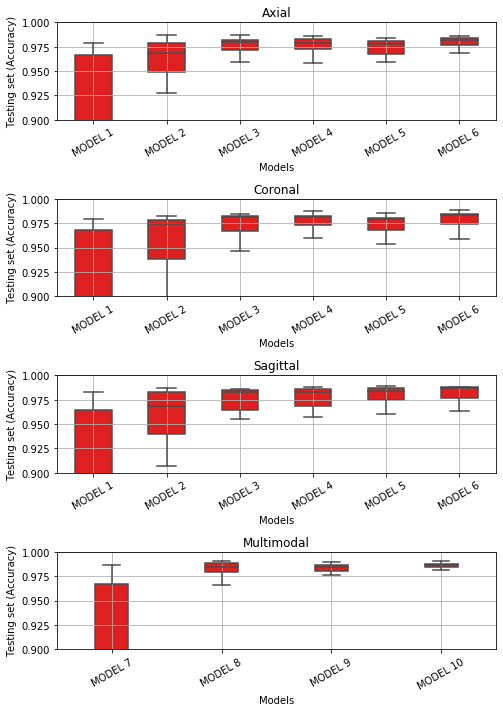

In [12]:
plt.figure(figsize=(7,10))
cont=1

for q in range(3):
  df2= frame.loc[:, 'slice'] == SLIC[q][:-1]
  df2= frame.loc[df2]
  plt.subplot(4,1,cont)
  sns.boxplot(x="models", y="test_acc", data=df2, width=0.5, showfliers = False, color='red')
  plt.title(SLICN[q][:-1])
  plt.xlabel('Models')
  plt.ylabel('Testing set (Accuracy)')
  plt.ylim((0.9, 1))
  plt.grid()
  plt.xticks(np.arange(6), NANMO, rotation=30)
  plt.tight_layout()    
  cont=cont+1
plt.subplot(4,1,cont)
sns.boxplot(x="models", y="test_acc", data=frame3, width=0.3, showfliers = False, color='red')
plt.title('Multimodal')
plt.xlabel('Models')
plt.ylabel('Testing set (Accuracy)')
plt.ylim((0.9, 1))
plt.grid()
plt.xticks(np.arange(4), NANMT, rotation=30)
plt.tight_layout() 
plt.savefig("TestModelostodaslasMuestras.svg")

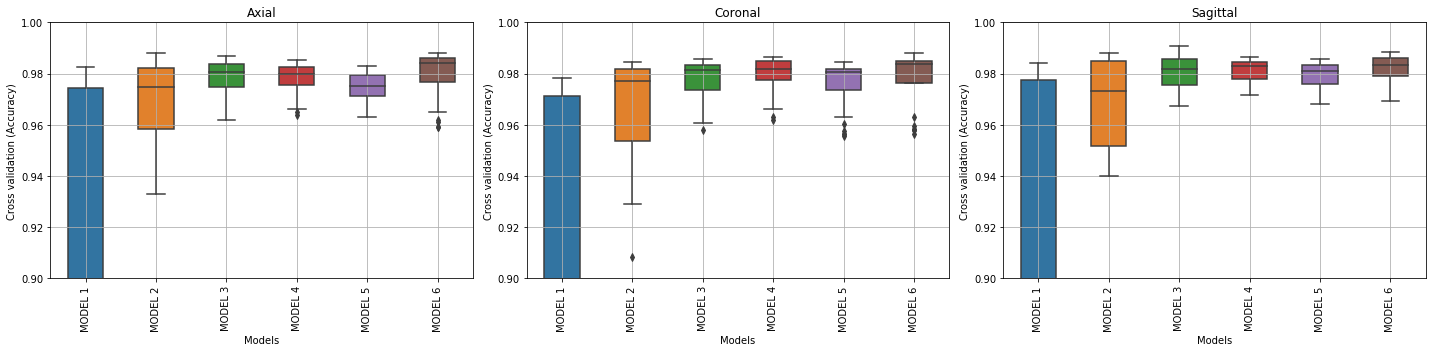

In [13]:
plt.figure(figsize=(20,5))
cont=1
for q in range(3):
  df2= frame.loc[:, 'slice'] == SLIC[q][:-1]
  df2= frame.loc[df2]

  plt.subplot(1,3,cont)
  sns.boxplot(x="models", y="val_acc", data=df2, width=0.5)
  plt.title(SLICN[q][:-1])
  plt.xlabel('Models')
  plt.ylabel('Cross validation (Accuracy)')
  plt.ylim((0.9, 1))
  plt.grid()
  plt.xticks(np.arange(6), NANMO, rotation='vertical')
  plt.tight_layout()    
  cont=cont+1
plt.savefig("MetodostodaslasMuestras.svg")

In [14]:
grp=15
frame3 = pd.read_csv(summ[grp])
print(summ[grp])
print(frame3)

drive/My Drive/AnexoResul/sHP-TR.csv
    Unnamed: 0  sample   models images  ...   val_acc      loss   val_loss  test_acc
0            0       0    TREE1    AXI  ...  0.895139  0.454344   0.340223  0.895760
1            1       1    TREE1    AXI  ...  0.104861  0.422766  31.927922  0.104240
2            2       2    TREE1    AXI  ...  0.895139  0.458267   0.346103  0.895760
3            3       0    TREE1    COM  ...  0.985254  0.352909   0.193672  0.970061
4            4       1    TREE1    COM  ...  0.895139  0.412116   0.338362  0.896635
..         ...     ...      ...    ...  ...       ...       ...        ...       ...
86          86       1  TRLENET  C_BLU  ...  0.986892  0.187710   0.090229  0.987325
87          87       2  TRLENET  C_BLU  ...  0.988531  0.263846   0.093034  0.986670
88          88       0  TRLENET  C_PCA  ...  0.985254  0.439747   0.238974  0.987325
89          89       1  TRLENET  C_PCA  ...  0.986892  0.300628   0.118999  0.989510
90          90       2  TRLE

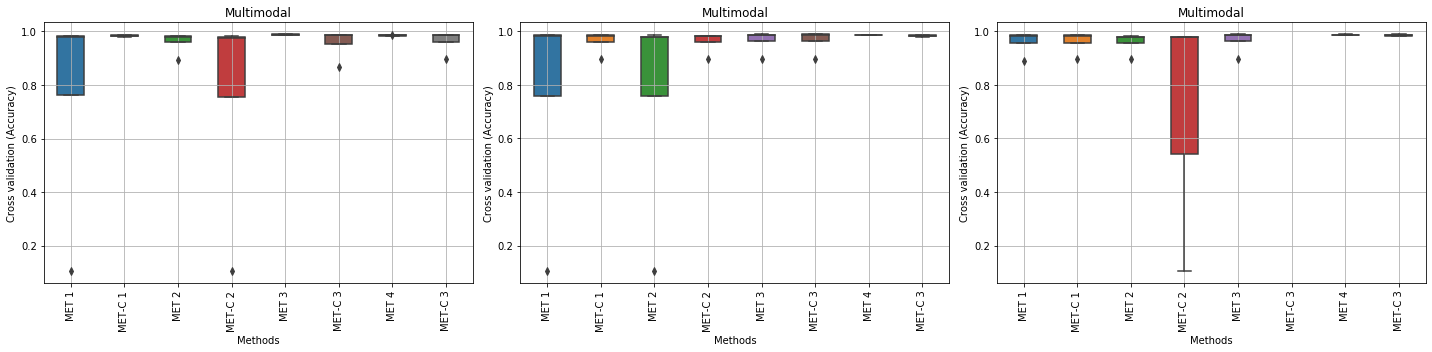

In [15]:
plt.figure(figsize=(20,5))
cont=1
for p in range(3):

  df =frame3.loc[:, 'sample'] == p
  df = frame3.loc[df]
  
  plt.subplot(1,3,cont)
  sns.boxplot(x="images", y="val_acc", data=df, width=0.5, order=ORDER)
  plt.title('Multimodal')
  plt.xlabel('Methods')
  plt.ylabel('Cross validation (Accuracy)')
  #plt.ylim((0.90, 1))
  plt.grid()
  plt.xticks(np.arange(8), NAMES, rotation='vertical')
  plt.tight_layout()    
  cont=cont+1
#plt.savefig("MetodosPorMuestra.svg")

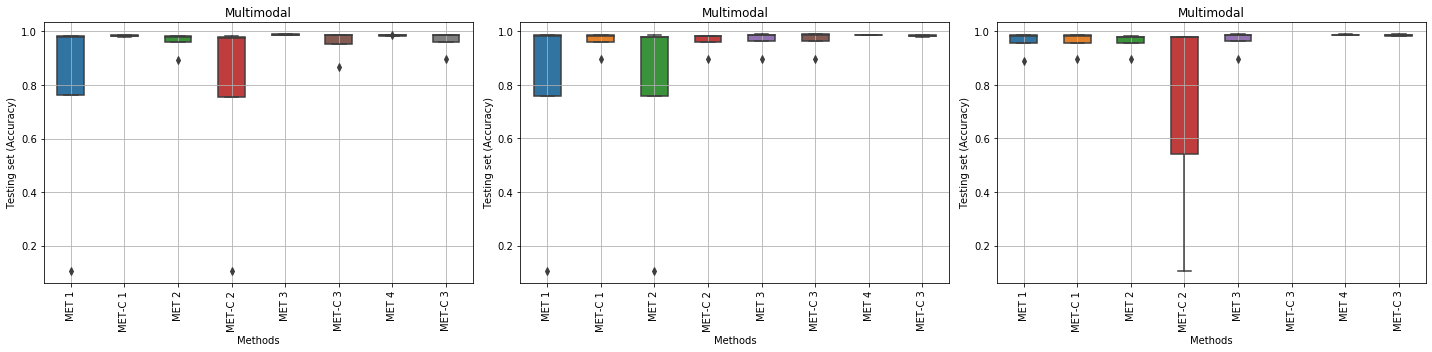

In [16]:
plt.figure(figsize=(20,5))
cont=1
for p in range(3):

  df =frame3.loc[:, 'sample'] == p
  df = frame3.loc[df]
  
  plt.subplot(1,3,cont)
  sns.boxplot(x="images", y="val_acc", data=df, width=0.5, order=ORDER)
  plt.title('Multimodal')
  plt.xlabel('Methods')
  plt.ylabel('Testing set (Accuracy)')
  #plt.ylim((0.90, 1))
  plt.grid()
  plt.xticks(np.arange(8), NAMES, rotation='vertical')
  plt.tight_layout()    
  cont=cont+1
#plt.savefig("MetodosPorMuestra.svg")

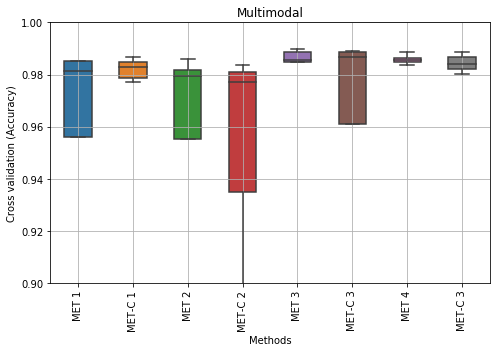

In [17]:
plt.figure(figsize=(7,5))

sns.boxplot(x="images", y="val_acc", data=frame3, width=0.5, order=ORDER)
plt.title('Multimodal')
plt.xlabel('Methods')
plt.ylabel('Cross validation (Accuracy)')
plt.ylim((0.90, 1))
plt.grid()
plt.xticks(np.arange(8), NAMES, rotation='vertical')
plt.tight_layout()    
cont=cont+1
#plt.savefig("MetodosPorMuestra.svg")

###Evaluación de los métodos (escalados) en función de modelos pero 

In [18]:
frame2 = pd.read_csv(summ[2])
print(frame2)

     Unnamed: 0  sample  models images  ...   val_acc      loss  val_loss  test_acc
0             0       0  MODEL1    AXI  ...  0.895139  0.435055  0.341563  0.895760
1             1       1  MODEL1    AXI  ...  0.895139  0.388634  0.308569  0.895760
2             2       2  MODEL1    AXI  ...  0.895139  0.407594  0.532819  0.895760
3             3       0  MODEL1    AXI  ...  0.951393  0.396204  0.335420  0.937063
4             4       1  MODEL1    AXI  ...  0.895139  0.399451  0.879040  0.895760
..          ...     ...     ...    ...  ...       ...       ...       ...       ...
427         427       1   LeNet  C_PCA  ...  0.985254  0.253556  0.118732  0.982080
428         428       2   LeNet  C_PCA  ...  0.986346  0.242367  0.230930  0.984484
429         429       0   LeNet  C_PCA  ...  0.983616  0.235575  0.130532  0.984266
430         430       1   LeNet  C_PCA  ...  0.987439  0.312478  0.242193  0.988855
431         431       2   LeNet  C_PCA  ...  0.981431  0.307985  0.123995  0

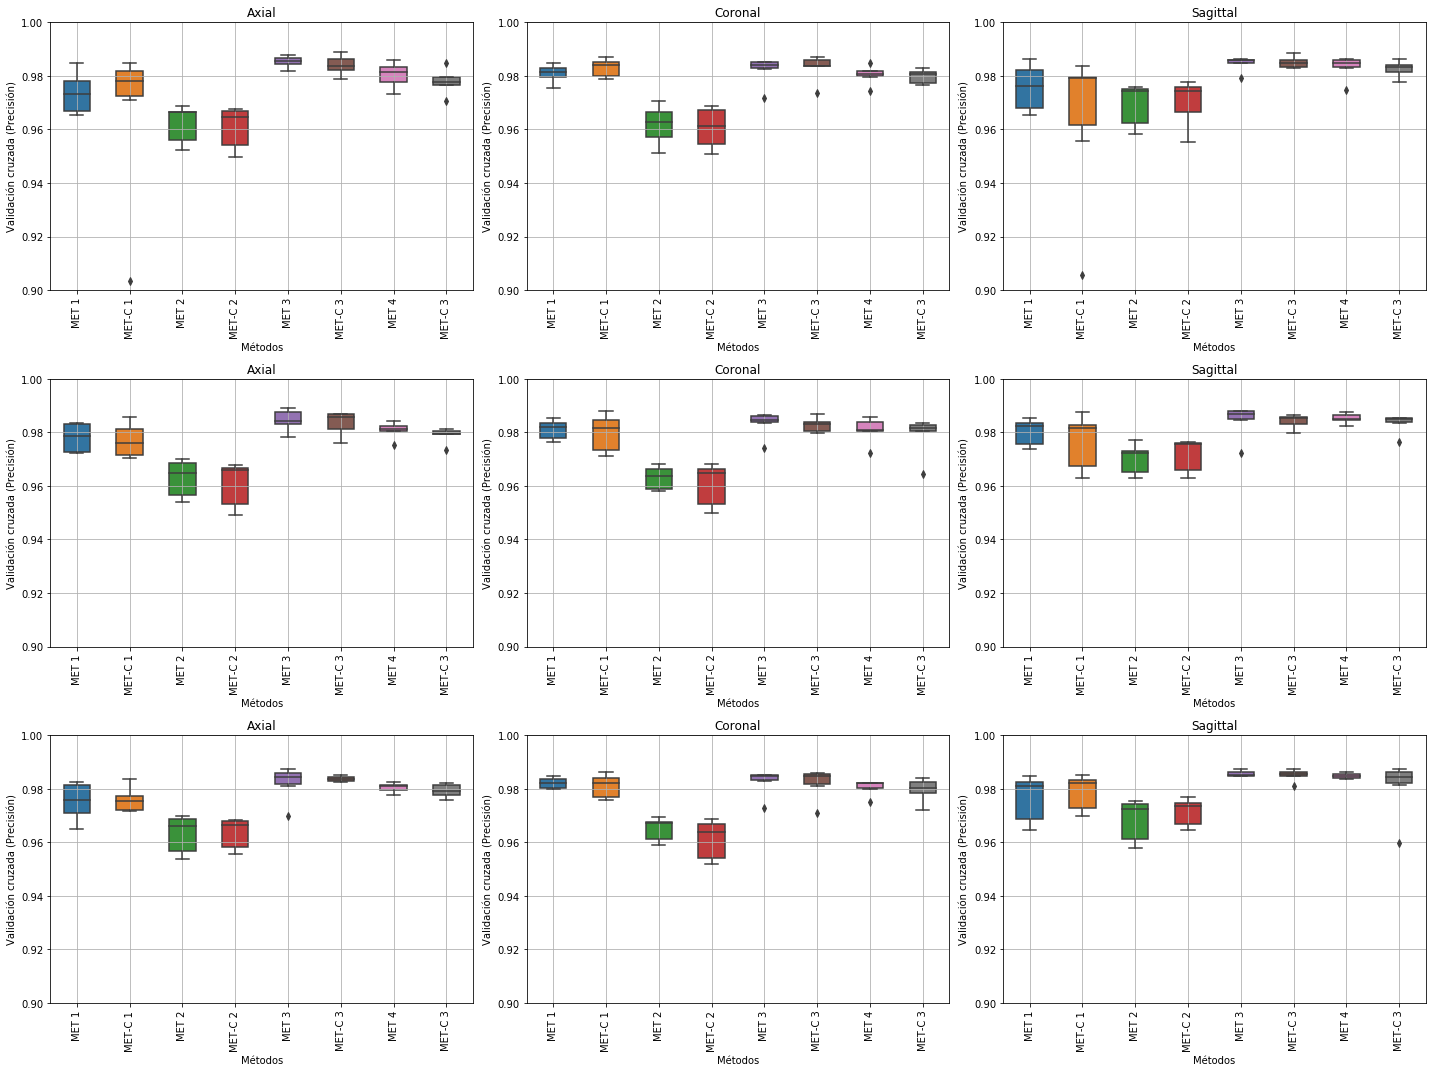

In [19]:
plt.figure(figsize=(20,15))
cont=1
for p in range(3):

  df =frame2.loc[:, 'sample'] == p
  df = frame2.loc[df]
  
  for q in range(3):

    df2= df.loc[:, 'slice'] == SLIC[q][:-1]
    df2= df.loc[df2]

    plt.subplot(3,3,cont)
    sns.boxplot(x="images", y="val_acc", data=df2, width=0.5, order=ORDER)
    plt.title(SLICN[q][:-1])
    plt.xlabel('Métodos')
    plt.ylabel('Validación cruzada (Precisión)')
    plt.ylim((0.90, 1))
    plt.grid()
    plt.xticks(np.arange(8), NAMES, rotation='vertical')
    plt.tight_layout()    
    cont=cont+1
plt.savefig("MetodospormuestraEscalado.svg")

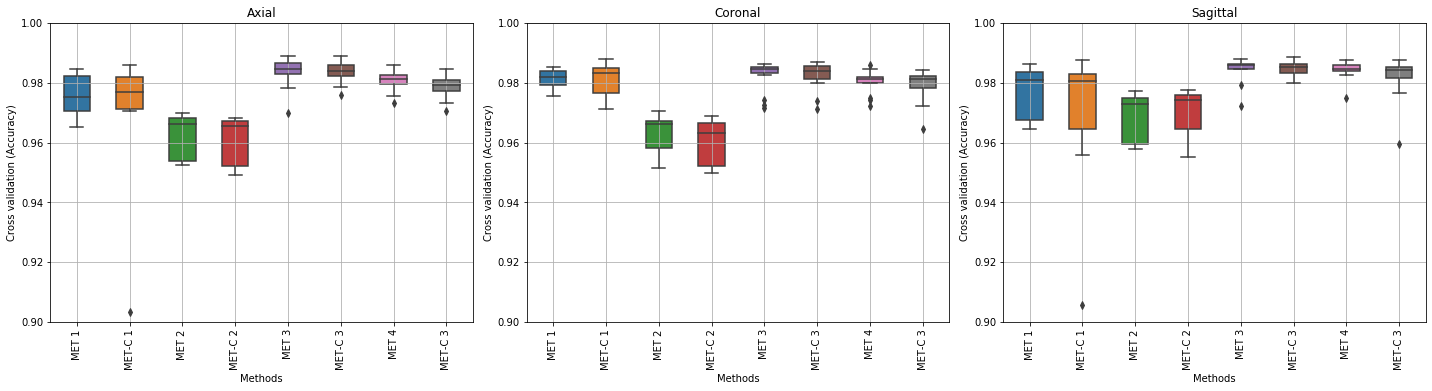

In [20]:
plt.figure(figsize=(20,15))
cont=1
for q in range(3):
  df2= frame2.loc[:, 'slice'] == SLIC[q][:-1]
  df2= frame2.loc[df2]

  plt.subplot(3,3,cont)
  sns.boxplot(x="images", y="val_acc", data=df2, width=0.5, order=ORDER)
  plt.title(SLICN[q][:-1])
  plt.xlabel('Methods')
  plt.ylabel('Cross validation (Accuracy)')
  plt.ylim((0.90, 1))
  plt.grid()
  plt.xticks(np.arange(8), NAMES, rotation='vertical')
  plt.tight_layout()    
  cont=cont+1
plt.savefig("MetodostodaslasMuestrasEscalados.svg")

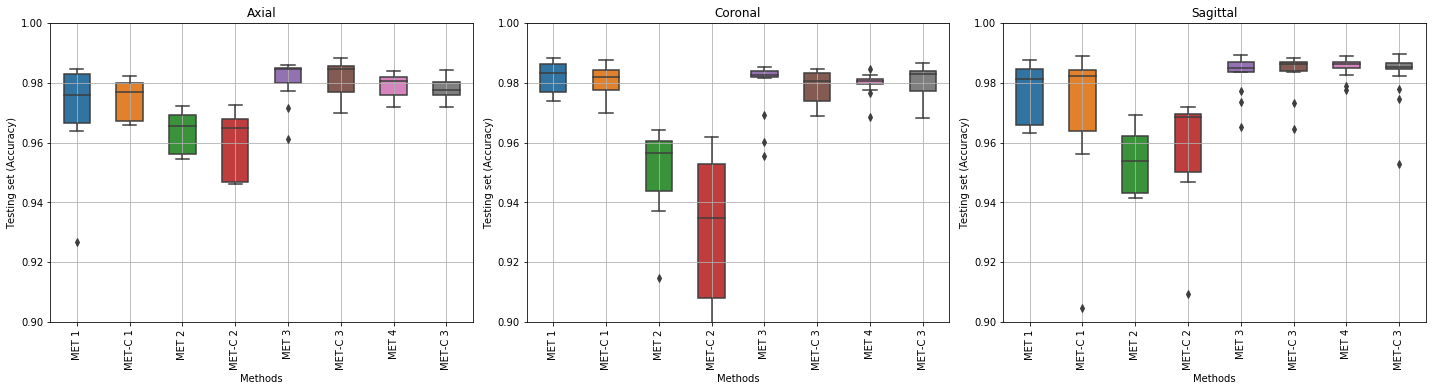

In [21]:
plt.figure(figsize=(20,15))
cont=1
for q in range(3):
  df2= frame2.loc[:, 'slice'] == SLIC[q][:-1]
  df2= frame2.loc[df2]

  plt.subplot(3,3,cont)
  sns.boxplot(x="images", y="test_acc", data=df2, width=0.5, order=ORDER)
  plt.title(SLICN[q][:-1])
  plt.xlabel('Methods')
  plt.ylabel('Testing set (Accuracy)')
  plt.ylim((0.90, 1))
  plt.grid()
  plt.xticks(np.arange(8), NAMES, rotation='vertical')
  plt.tight_layout()    
  cont=cont+1
plt.savefig("TestodaslasmuestrasEscalado.svg")

### Graficas por redes

In [22]:
for i in summ:
  print(i)

drive/My Drive/AnexoResul/adosHP.csv
drive/My Drive/AnexoResul/dos-01.csv
drive/My Drive/AnexoResul/dos-02.csv
drive/My Drive/AnexoResul/tados0.csv
drive/My Drive/AnexoResul/tados1.csv
drive/My Drive/AnexoResul/tados2.csv
drive/My Drive/AnexoResul/tados4.csv
drive/My Drive/AnexoResul/tados3.csv
drive/My Drive/AnexoResul/tados5.csv
drive/My Drive/AnexoResul/tadoX0.csv
drive/My Drive/AnexoResul/tadoX1.csv
drive/My Drive/AnexoResul/tadoX2.csv
drive/My Drive/AnexoResul/tadoX3.csv
drive/My Drive/AnexoResul/tadoX4.csv
drive/My Drive/AnexoResul/tadoX5.csv
drive/My Drive/AnexoResul/sHP-TR.csv
drive/My Drive/AnexoResul/sHP-TE.csv
drive/My Drive/AnexoResul/dos-03.csv
drive/My Drive/AnexoResul/dos-04.csv
drive/My Drive/AnexoResul/tadoT2.csv
drive/My Drive/AnexoResul/tadoT0.csv
drive/My Drive/AnexoResul/tadoT1.csv
drive/My Drive/AnexoResul/tadoT3.csv
drive/My Drive/AnexoResul/tadoT4.csv
drive/My Drive/AnexoResul/tadoT5.csv
drive/My Drive/AnexoResul/tadTX0.csv
drive/My Drive/AnexoResul/tadTX1.csv
d

### Valor p
Valor p menor que 0.05 significa que hay diferencia y mayor que no hay diferencia o sea son iguales

Escaladas y no escaladas

In [24]:
from scipy import stats
#6 accuracy
#9 testing accuracy

validation=6

framex = pd.read_csv(summ[1])
print(framex)
framey = pd.read_csv(summ[2])
print(framey)

for i in MODELS:
  dfx= framex.loc[:, 'models'] == i[:-1]
  dfx= framex.loc[dfx].iloc[:,validation].to_numpy()
  dfy= framey.loc[:, 'models'] == i[:-1]
  dfy= framey.loc[dfy].iloc[:,validation].to_numpy()
  print(stats.kruskal(dfx, dfy))

framex = pd.read_csv(summ[15])
#print(framex)
framey = pd.read_csv(summ[16])
#print(framey)

for i in MODEL2:
  dfx= framex.loc[:, 'models'] == i[:-1]
  dfx= framex.loc[dfx].iloc[:,validation].to_numpy()
  dfy= framey.loc[:, 'models'] == i[:-1]
  dfy= framey.loc[dfy].iloc[:,validation].to_numpy()
  print(stats.kruskal(dfx, dfy))

validation=9

framex = pd.read_csv(summ[1])
#print(framex)
framey = pd.read_csv(summ[2])
#print(framey)

for i in MODELS:
  dfx= framex.loc[:, 'models'] == i[:-1]
  dfx= framex.loc[dfx].iloc[:,validation].to_numpy()
  dfy= framey.loc[:, 'models'] == i[:-1]
  dfy= framey.loc[dfy].iloc[:,validation].to_numpy()
  print(stats.kruskal(dfx, dfy))

framex = pd.read_csv(summ[15])
#print(framex)
framey = pd.read_csv(summ[16])
#print(framey)

for i in MODEL2:
  dfx= framex.loc[:, 'models'] == i[:-1]
  dfx= framex.loc[dfx].iloc[:,validation].to_numpy()
  dfy= framey.loc[:, 'models'] == i[:-1]
  dfy= framey.loc[dfy].iloc[:,validation].to_numpy()
  print(stats.kruskal(dfx, dfy))

validation=9

framex = pd.read_csv(summ[1])
#print(framex)
framey = pd.read_csv(summ[1])
#print(framey)

for i in MODELS:
  dfx= framex.loc[:, 'models'] == i[:-1]
  dfx= framex.loc[dfx].iloc[:,6].to_numpy()
  dfy= framey.loc[:, 'models'] == i[:-1]
  dfy= framey.loc[dfy].iloc[:,9].to_numpy()
  print(stats.kruskal(dfx, dfy))

framex = pd.read_csv(summ[15])
#print(framex)
framey = pd.read_csv(summ[15])
#print(framey)

for i in MODEL2:
  dfx= framex.loc[:, 'models'] == i[:-1]
  dfx= framex.loc[dfx].iloc[:,6].to_numpy()
  dfy= framey.loc[:, 'models'] == i[:-1]
  dfy= framey.loc[dfy].iloc[:,9].to_numpy()
  print(stats.kruskal(dfx, dfy))

     Unnamed: 0  sample  models images  ...   val_acc      loss  val_loss  test_acc
0             0       0  MODEL1    AXI  ...  0.895139  0.397645  0.337224  0.895760
1             1       1  MODEL1    AXI  ...  0.895139  0.394742  0.320946  0.895760
2             2       2  MODEL1    AXI  ...  0.895139  0.412345  0.336315  0.895760
3             3       0  MODEL1    AXI  ...  0.895139  0.402098  0.389770  0.895760
4             4       1  MODEL1    AXI  ...  0.895139  0.388651  0.347024  0.895760
..          ...     ...     ...    ...  ...       ...       ...       ...       ...
427         427       1   LeNet  C_PCA  ...  0.986346  0.231827  0.338157  0.986888
428         428       2   LeNet  C_PCA  ...  0.983616  0.340064  0.149750  0.987544
429         429       0   LeNet  C_PCA  ...  0.984162  0.320260  0.158927  0.988636
430         430       1   LeNet  C_PCA  ...  0.983069  0.383537  0.428619  0.984047
431         431       2   LeNet  C_PCA  ...  0.980339  0.216824  0.117981  0

### Comparacion entre contornos

In [0]:
IMAX=['C_AXI-','C_COM-','C_BLU-','C_PCA-']

In [26]:
#6 accuracy
#9 testing accuracy

validation=6

framex = pd.read_csv(summ[2])
print(framex)

for i in MODELS:
  dfx2= framex.loc[:, 'models'] == i[:-1]
  dfx2= framex.loc[dfx2]

  for j in IMAX:   

    dfx= dfx2.loc[:, 'images'] == j[:-1]
    dfx= dfx2.loc[dfx].iloc[:,validation].to_numpy()    

    dfy= dfx2.loc[:, 'images'] == j[2:-1]
    dfy= dfx2.loc[dfy].iloc[:,validation].to_numpy()

    print(stats.kruskal(dfx, dfy))

framex = pd.read_csv(summ[16])
print(framex)

for i in MODEL2:
  dfx2= framex.loc[:, 'models'] == i[:-1]
  dfx2= framex.loc[dfx2]

  for j in IMAX:   

    dfx= dfx2.loc[:, 'images'] == j[:-1]
    dfx= dfx2.loc[dfx].iloc[:,validation].to_numpy()    

    dfy= dfx2.loc[:, 'images'] == j[2:-1]
    dfy= dfx2.loc[dfy].iloc[:,validation].to_numpy()

    print(stats.kruskal(dfx, dfy))


     Unnamed: 0  sample  models images  ...   val_acc      loss  val_loss  test_acc
0             0       0  MODEL1    AXI  ...  0.895139  0.435055  0.341563  0.895760
1             1       1  MODEL1    AXI  ...  0.895139  0.388634  0.308569  0.895760
2             2       2  MODEL1    AXI  ...  0.895139  0.407594  0.532819  0.895760
3             3       0  MODEL1    AXI  ...  0.951393  0.396204  0.335420  0.937063
4             4       1  MODEL1    AXI  ...  0.895139  0.399451  0.879040  0.895760
..          ...     ...     ...    ...  ...       ...       ...       ...       ...
427         427       1   LeNet  C_PCA  ...  0.985254  0.253556  0.118732  0.982080
428         428       2   LeNet  C_PCA  ...  0.986346  0.242367  0.230930  0.984484
429         429       0   LeNet  C_PCA  ...  0.983616  0.235575  0.130532  0.984266
430         430       1   LeNet  C_PCA  ...  0.987439  0.312478  0.242193  0.988855
431         431       2   LeNet  C_PCA  ...  0.981431  0.307985  0.123995  0

In [0]:
summ2=summ[:15] #Una imagen
summ3=summ[15:] #Multimodal
MODELS=['MODEL1-','LAYER1-','LAYER2-','LAYER3-','LAYER4-','LeNet-']
IMAGE=['AXI-','COM-','BLU-','PCA-','C_AXI-','C_COM-','C_BLU-','C_PCA-']
SLIC=['Axial-','Coronal-','Saggital-']

In [51]:
print(np.shape(summ2))
print(np.shape(summ3))

(15,)
(15,)


In [53]:
fram = pd.read_csv(summ[0])
print(fram)

     Unnamed: 0  sample  models images  ...   val_acc      loss  val_loss  test_acc
0             0       0  MODEL1    AXI  ...  0.895139  0.400872  0.419792  0.895760
1             1       1  MODEL1    AXI  ...  0.895139  0.391782  0.341254  0.895760
2             2       2  MODEL1    AXI  ...  0.895139  0.393312  0.336407  0.895760
3             3       0  MODEL1    AXI  ...  0.895139  0.414595  0.337324  0.895760
4             4       1  MODEL1    AXI  ...  0.895139  0.387449  0.342997  0.895760
..          ...     ...     ...    ...  ...       ...       ...       ...       ...
427         427       1   LeNet  C_PCA  ...  0.982523  0.224755  0.195154  0.988418
428         428       2   LeNet  C_PCA  ...  0.984708  0.252289  0.122340  0.986014
429         429       0   LeNet  C_PCA  ...  0.983616  0.438482  0.451388  0.984921
430         430       1   LeNet  C_PCA  ...  0.981977  0.351428  0.208734  0.988418
431         431       2   LeNet  C_PCA  ...  0.979792  0.369816  0.258169  0

In [54]:
fram.head()

,Unnamed: 0,sample,models,images,slice,acc,val_acc,loss,val_loss,test_acc
0,0,0,MODEL1,AXI,Axial,0.899393,0.895139,0.400872,0.419792,0.89576
1,1,1,MODEL1,AXI,Axial,0.899393,0.895139,0.391782,0.341254,0.89576
2,2,2,MODEL1,AXI,Axial,0.899393,0.895139,0.393312,0.336407,0.89576
3,3,0,MODEL1,AXI,Coronal,0.899393,0.895139,0.414595,0.337324,0.89576
4,4,1,MODEL1,AXI,Coronal,0.899393,0.895139,0.387449,0.342997,0.89576


In [0]:
accur=np.zeros((6,8,3))
tests=np.zeros((6,8,3))

for i in range(15):
  fram = pd.read_csv(summ2[i])
  for j in range(6):
    pos= fram.loc[:, 'models'] == MODELS[j][:-1]
    fram1= fram.loc[pos]

    for k in range(8):
      pos= fram1.loc[:, 'images'] == IMAGE[k][:-1]
      fram2= fram1.loc[pos]  

      for l in range(3):
        pos= fram2.loc[:, 'slice'] == SLIC[l][:-1]
        fram3= fram2.loc[pos] 
        
        vacc=fram3.iloc[:,5].to_numpy()
        vtest=fram3.iloc[:,9].to_numpy()
        #print(i,j,k,l)
        if not len(vacc)==0:
          vacc2=np.max(vacc)
          if vacc2>accur[j,k,l]:
            accur[j,k,l]=vacc2

        if not len(vtest)==0:
          vtest2=np.max(vtest)
          if vtest2>tests[j,k,l]:
            tests[j,k,l]=vtest2

In [0]:
accurT=np.zeros((4,8))
testsT=np.zeros((4,8))

for i in range(15):
  fram = pd.read_csv(summ3[i])
  for j in range(4):
    if i>=4:
      pos= fram.loc[:, 'models'] == MODEL2[j][1:-1]
      fram1= fram.loc[pos]
    else:
      pos= fram.loc[:, 'models'] == MODEL2[j][:-1]
      fram1= fram.loc[pos]

    for k in range(8):
      pos= fram1.loc[:, 'images'] == IMAGE[k][:-1]
      fram2= fram1.loc[pos]  
      
      vacc=fram2.iloc[:,5].to_numpy()
      vtest=fram2.iloc[:,9].to_numpy()
      #print(i,j,k,l)
      if not len(vacc)==0:
        vacc2=np.max(vacc)
        if vacc2>accurT[j,k]:
          accurT[j,k]=vacc2

      if not len(vtest)==0:
        vtest2=np.max(vtest)
        if vtest2>testsT[j,k]:
          testsT[j,k]=vtest2

In [129]:
MODELS

['MODEL1-', 'LAYER1-', 'LAYER2-', 'LAYER3-', 'LAYER4-', 'LeNet-']

In [124]:
for i in range(6):
  print(tabulate(pd.DataFrame(data=np.transpose(tests[i])), headers='keys', tablefmt='psql'))

+----+----------+----------+----------+----------+----------+----------+----------+----------+
|    |        0 |        1 |        2 |        3 |        4 |        5 |        6 |        7 |
|----+----------+----------+----------+----------+----------+----------+----------+----------|
|  0 | 0.89576  | 0.980332 | 0.97924  | 0.974432 | 0.948645 | 0.975087 | 0.978365 | 0.896853 |
|  1 | 0.937063 | 0.973776 | 0.981206 | 0.979458 | 0.934659 | 0.973121 | 0.975962 | 0.963889 |
|  2 | 0.940997 | 0.973558 | 0.984703 | 0.965253 | 0.946678 | 0.975087 | 0.977928 | 0.90472  |
+----+----------+----------+----------+----------+----------+----------+----------+----------+
+----+----------+----------+----------+----------+----------+----------+----------+----------+
|    |        0 |        1 |        2 |        3 |        4 |        5 |        6 |        7 |
|----+----------+----------+----------+----------+----------+----------+----------+----------|
|  0 | 0.957168 | 0.987325 | 0.982299 | 0.969624 |

In [127]:
print(tabulate(pd.DataFrame(data=testsT), headers='keys', tablefmt='psql'))

+----+----------+----------+----------+----------+----------+----------+----------+----------+
|    |        0 |        1 |        2 |        3 |        4 |        5 |        6 |        7 |
|----+----------+----------+----------+----------+----------+----------+----------+----------|
|  0 | 0.89576  | 0.980114 | 0.987107 | 0.89576  | 0.89576  | 0.984266 | 0.981206 | 0.979021 |
|  1 | 0.97924  | 0.989948 | 0.989948 | 0.988418 | 0.981643 | 0.990822 | 0.99104  | 0.987544 |
|  2 | 0.982955 | 0.991667 | 0.989292 | 0.989729 | 0.981425 | 0.989729 | 0.987762 | 0.990822 |
|  3 | 0.982955 | 0.990822 | 0.98951  | 0.991259 | 0.983392 | 0.99104  | 0.988855 | 0.992133 |
+----+----------+----------+----------+----------+----------+----------+----------+----------+


In [181]:
indx=[1,3,4,5,6,7,8]
indt=[2,4,5,6,7,8,9]

indxE=[2,9,10,11,12,7,14]
indtE=[3,10,11,12,13,14,15]

for i in indxE:
  print(summ2[i])
for i in indtE:
  print(summ3[i])

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", "#fec44f"]

drive/My Drive/AnexoResul/dos-02.csv
drive/My Drive/AnexoResul/tadoX0.csv
drive/My Drive/AnexoResul/tadoX1.csv
drive/My Drive/AnexoResul/tadoX2.csv
drive/My Drive/AnexoResul/tadoX3.csv
drive/My Drive/AnexoResul/tados3.csv
drive/My Drive/AnexoResul/tadoX5.csv
drive/My Drive/AnexoResul/dos-04.csv
drive/My Drive/AnexoResul/tadTX0.csv
drive/My Drive/AnexoResul/tadTX1.csv
drive/My Drive/AnexoResul/tadTX2.csv
drive/My Drive/AnexoResul/tadTX3.csv
drive/My Drive/AnexoResul/tadTX4.csv
drive/My Drive/AnexoResul/tadTX5.csv


In [0]:
GRP=['1200-HP_hcp2000', '1000-WhII_MB6', '145-Standard', '180-Standard', '200-Standard', '200-WhII_Standard', '460-WhII_MB6']

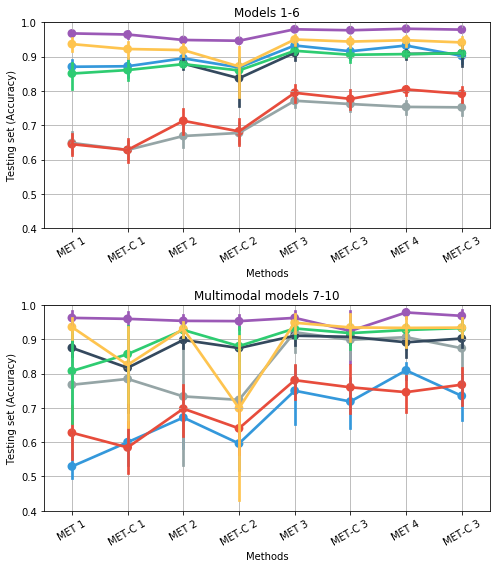

In [246]:
plt.figure(figsize=(7,8))
plt.subplot(2,1,1)
cont=0
for i in indxE:
  sns.pointplot(x="images", y="test_acc", data=pd.read_csv(summ2[i]), color=flatui[cont], order=ORDER, label=GRP[cont])
  #lines.append(li)
  cont=cont+1

plt.title('Models 1-6')
plt.xlabel('Methods')
plt.ylabel('Testing set (Accuracy)')
plt.ylim((0.4, 1))
plt.grid()
plt.xticks(np.arange(8), NAMES, rotation=30)
plt.tight_layout()
#plt.legend()

cont=0
lines=[]
plt.subplot(2,1,2)
for i in indt:
  sns.pointplot(x="images", y="test_acc", data=pd.read_csv(summ3[i]), color=flatui[cont], order=ORDER, label=GRP[cont])
  cont=cont+1
plt.title('Multimodal models 7-10')
plt.xlabel('Methods')
plt.ylabel('Testing set (Accuracy)')
plt.ylim((0.4, 1))
plt.grid()
plt.xticks(np.arange(8), NAMES, rotation=30)
plt.tight_layout()
#plt.legend()
plt.savefig("Grupos.svg")

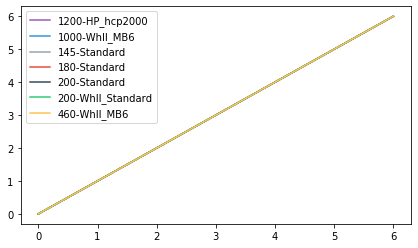

In [245]:
plt.figure(figsize=(7,4))
x=np.arange(7)
for i in range(7):
  plt.plot(x,x, label=GRP[i], color=flatui[i])
plt.legend()
plt.savefig("etiquetas.svg")


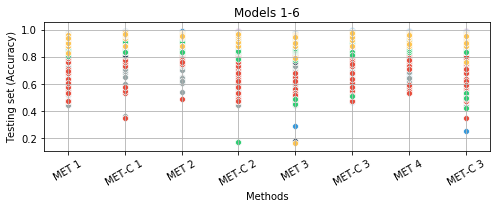

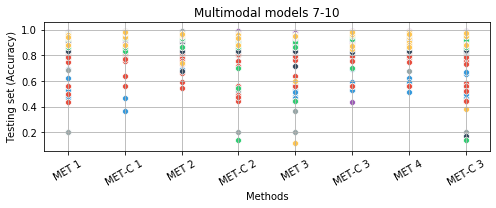

In [223]:
plt.figure(figsize=(7,3))
cont=0
for i in indxE:
  sns.scatterplot(x="images", y="test_acc", data=pd.read_csv(summ2[i]), color=flatui[cont])
  cont=cont+1

plt.title('Models 1-6')
plt.xlabel('Methods')
plt.ylabel('Testing set (Accuracy)')
#plt.ylim((0.90, 1))
plt.grid()
plt.xticks(np.arange(8), NAMES, rotation=30)
plt.tight_layout()

plt.figure(figsize=(7,3))
cont=0
for i in indt:
  sns.scatterplot(x="images", y="test_acc", data=pd.read_csv(summ3[i]), color=flatui[cont])
  cont=cont+1
plt.title('Multimodal models 7-10')
plt.xlabel('Methods')
plt.ylabel('Testing set (Accuracy)')
#plt.ylim((0.90, 1))
plt.grid()
plt.xticks(np.arange(8), NAMES, rotation=30)
plt.tight_layout()